### Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utils as utils
import seaborn as sns
import warnings

c:\Users\HAMZA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [2]:
# For output settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)

# For warnings
warnings.filterwarnings("ignore")


### Load Data

In [3]:
train_df = pd.read_parquet("train_final.parquet")


### First Edit

In [4]:
utils.first_edit(train_df)

### Info About Dataset

In [5]:
utils.check_df(train_df)

##################### Shape #####################
(94049, 58)
##################### Types #####################
id              object
month            int64
n_seconds_1    float64
n_seconds_2    float64
n_seconds_3    float64
carrier         object
devicebrand     object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31    

In [5]:
cat_cols, num_cols,cat_but_car = utils.grab_col_names(train_df,p=True)

Observations: 94049
Variables: 58
cat_cols: 1
num_cols: 53
cat_but_car: 4
num_but_cat: 1


### Visualize Data

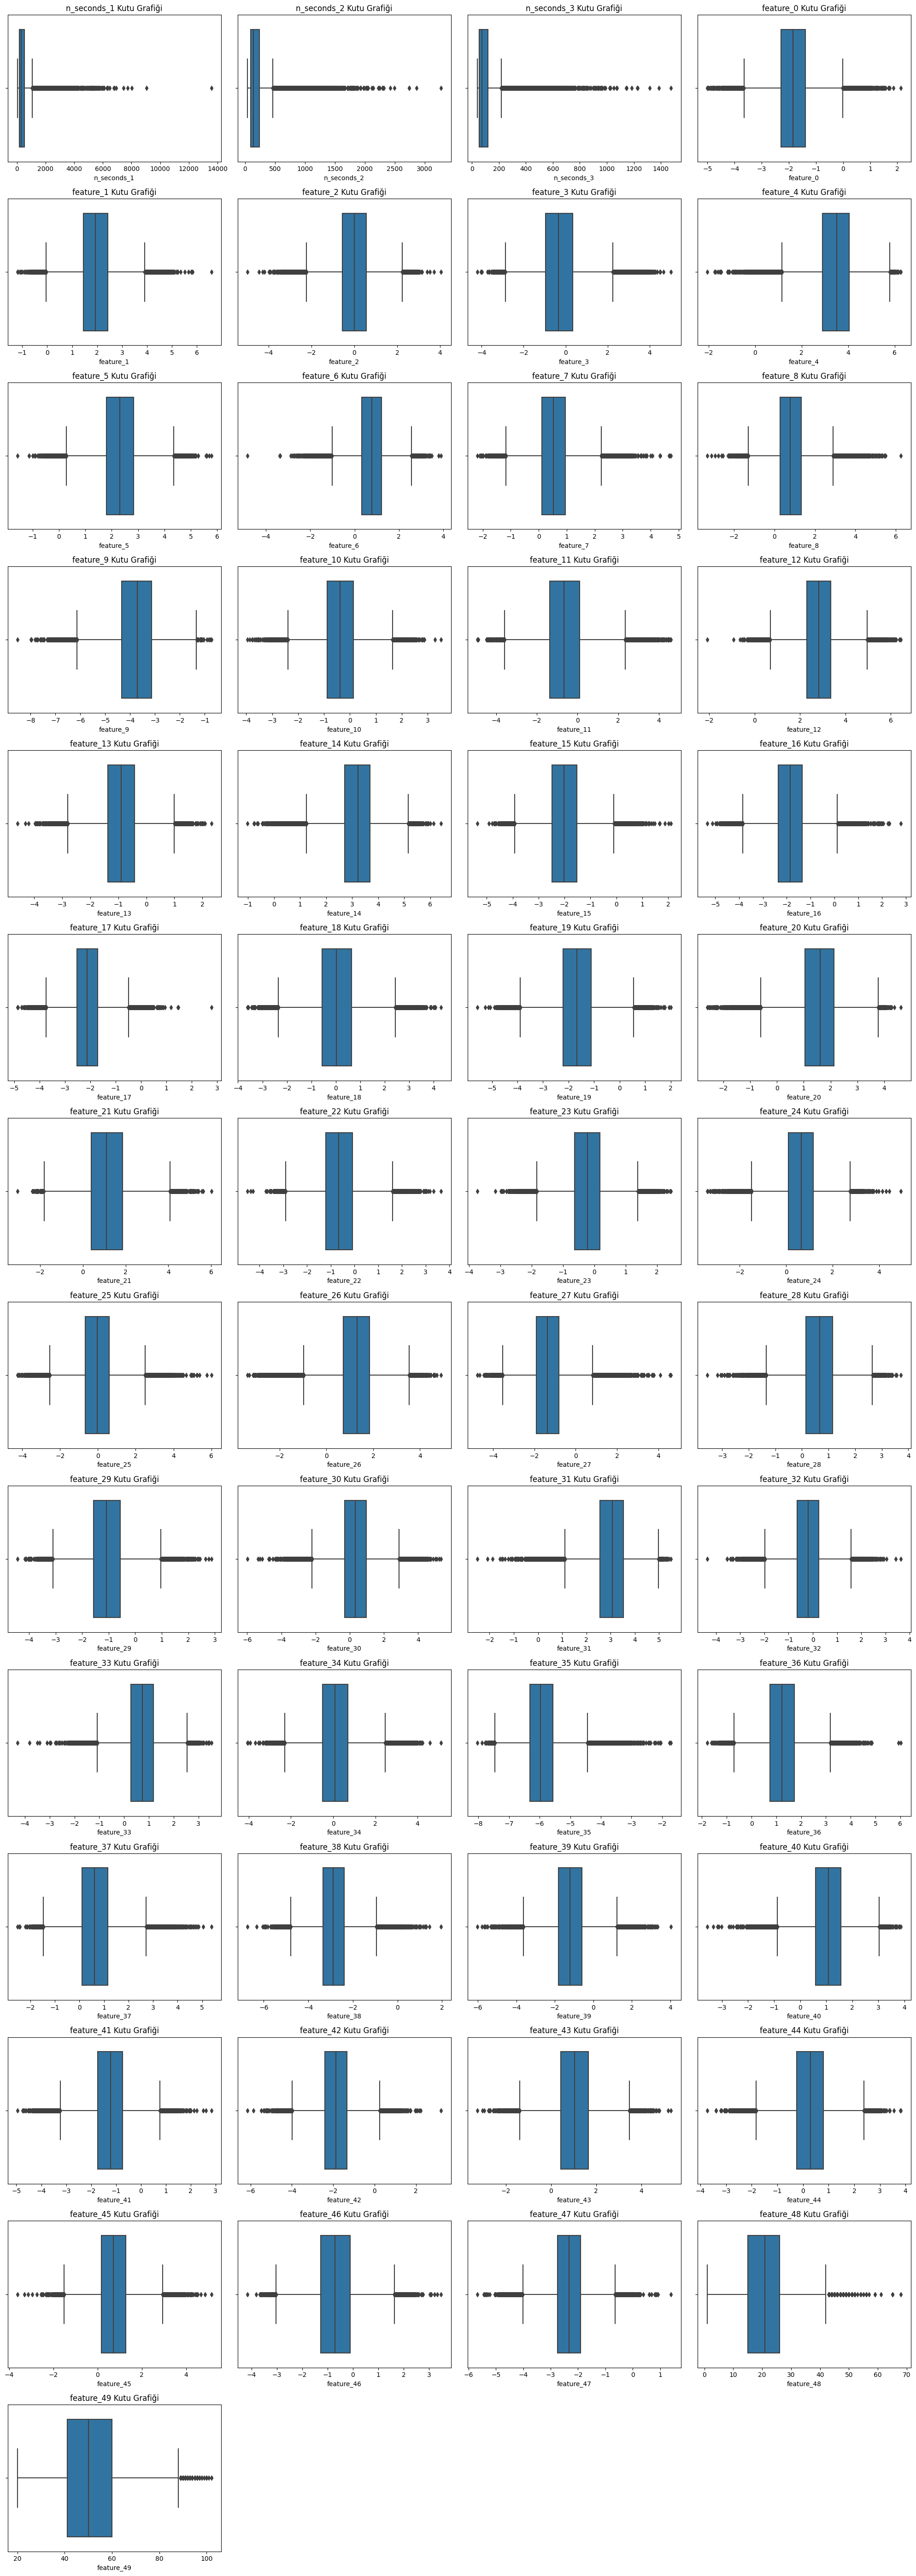

In [6]:
n_cols = 4  # 4 columns in the grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

for i, column in enumerate(num_cols):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=train_df[column], ax=axs[row, col])
    axs[row, col].set_title(f'{column} Kutu Grafiği')

# Removing empty subplots (if any)
for i in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

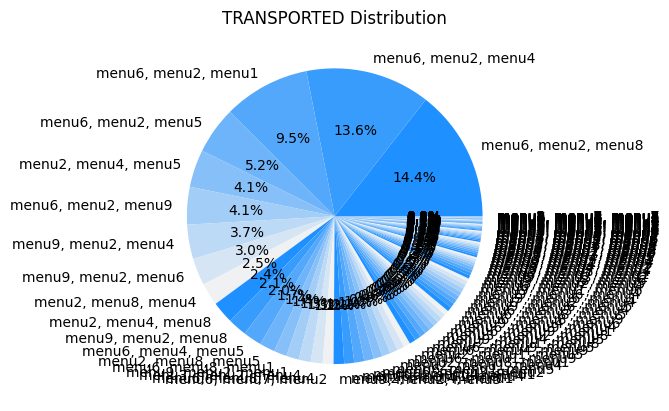

In [7]:
utils.plot_distributions(train_df,'target', target_pie=True)

In [8]:
train_df.describe(include='object').T

,count,unique,top,freq
id,94049,80478,60f93207a330776bbe5bd4fb2,3
carrier,94049,556,TURKCELL,39043
devicebrand,94049,64,Apple,33238
target,94049,112,"menu6, menu2, menu8",13583


In [38]:
utils.cat_summary(train_df,'carrier')

            carrier      Ratio
carrier                       
TURKCELL      39333  41.821816
VODAFONE      26445  28.118321
TELEKOM       22180  23.583451
UNKNOWN        2382   2.532722
BIMCELL        1110   1.180236
KKTCELL         659   0.700699
TEKNOSA         575   0.611383
PTTCELL         423   0.449766
O2              169   0.179694
AVEA             96   0.102074
GSMOBILE         86   0.091442
ORANGE           69   0.073366
T-MOBILE         63   0.066986
NL               35   0.037215
STC              32   0.034025
ETISALAT         30   0.031898
BEE              25   0.026582
ZAIN             23   0.024455
SUNRISE          22   0.023392
SALT             20   0.021266
YETTEL           20   0.021266
AZERCELL         19   0.020202
GEOCELL          19   0.020202
AYYILDIZ         18   0.019139
ASIACELL         18   0.019139
SFR              15   0.015949
TELENOR          10   0.010633
BOUYGUES         10   0.010633
PROXIMUS          9   0.009569
WINDTRE           9   0.009569
TIGO    

### Carrier

In [29]:
train_df = pd.read_parquet("train_final.parquet")
utils.first_edit(train_df)


In [30]:
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'VODAFONE' if 'VODAFONE' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'VODAFONE' if 'VF' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURKCELL' if 'LIFECELL' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TURK TELEKO' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TÜRK TELEKO' in x else x)
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'TURK_TELEKOM' if 'TURKTELEKOM' in x else x)
train_df['carrier'] = train_df['carrier'].str.replace('^KCELL ', 'AKCELL', regex=True) 

In [31]:
yurtdisi = ['ALMADAR','AIRTEL','AZERCELL','BAKCELL','O2','BEE','A1 ','3_AT','IRANCELL',
            'AYYILDIZ','BH','NL','ORANGE','MOLDCELL','ZAIN','YETTEL','VERIZONE','TELEKOM',
            'TELENOR','TELE2','TELIA','MAGTI','STC','BOUYGUES','HORMUUD','JIO','LIDL','KSA',
            'FREEDOM','BUDGET','XFINITY','CHINA_TELECOM','MTN','1&1','BASE','CLARO','GEOCELL',
            'MEGAFONE','GSMOBILE','ETISALAT','TIM','MAXIS','PROXIMUS', 'SUNRISE', 'WINDTRE', 
            'VODACOM', 'LYCAMOBILE','LIBYANA','TIGO', 'ASIACELL', 'SFR','CUBACELL','AKCELL','SALT','T-MOBILE'] 
sirket = ['TURKCELL','BIMCELL','AVEA','VODAFONE','TURK_TELEKOM','TEKNOSA','PTTCELL','KKTCELL']

birlesim = yurtdisi+sirket

for anahtarKelime in birlesim:
    train_df['carrier'] = train_df['carrier'].apply(lambda x: anahtarKelime if anahtarKelime in x else x)

In [37]:
b=train_df['carrier'].unique()

In [33]:
unknown1 = ['HAYAT','FENER','TRABZON','61','UNKNOWN',' ','nknown']
for anahtarKelime in unknown1:
    train_df['carrier'] = train_df['carrier'].apply(lambda x: 'UNKNOWN' if anahtarKelime in x else x)

In [35]:
unknown = [row for row in b if row not in birlesim]

In [36]:
train_df['carrier'] = train_df['carrier'].apply(lambda x: 'UNKNOWN' if x in unknown else x if x not in unknown else x)

In [16]:
a=train_df['devicebrand'].unique()

In [54]:
b=train_df['carrier'].unique()
print(b)

['VODAFONE' 'TURKCELL' 'TELEKOM' 'Unknown' 'BIMCELL' 'PTTCELL' 'TEKNOSA'
 'O2' 'KKTCELL' 'CUMHURIYET' 'CAPA' 'IAM' 'VERIZON' 'STC'
 'SULEYMAN YAGIZ ' '3 AT' 'HAYATEVESIGAR' 'XFINITY' 'GSMOBILE' 'FENERCELL'
 'TELIA' '1&1' 'BASE' 'CLARO PERU' 'BOUYGUES' 'OZLEM' 'GEOCELL'
 'TRABZONCELL' 'NL' 'ERTANZULAL' 'KOREK' 'SUNRISE' 'Z 4.5G+'
 'MEDIONMOBILE' 'METIN' 'DIVERSEY KIMYA' 'AYYILDIZ' 'EVATIS' ' ' 'ZAIN'
 'AVEA' 'HYPNOGAJA' 'IBRAHIM KUTSI ' 'GAYETIYICEKIYOR' 'UAE 51 ETISALAT'
 'VODA AU' 'OSMAN SARIKAYA ' 'ETISALAT' 'ORANGE' 'SALT' 'ELUX'
 'MUTLU YILLAR' 'KSA' 'VIRGIN' 'CARRIER' 'BEE' 'ILIAD' 'BURAK' 'UZB UCELL'
 'FREE' 'TAMER' 'AZERCELL' 'BLACK WOLF' 'F SFR' 'T-MOBILE' 'CUBACEL' 'SFR'
 'KCELL' 'ASIACELL' '3 SE' 'TIGO' 'EVDEHAYATVAR' 'SAMIH YILDIRIM' 'DU'
 'PREMIUMSIM' 'DOLAŞIM GÖSTERGESI KAPALI.' 'TALKMORE' 'ATA HAN'
 'عيش الحماس' 'TELE2' 'LIBYANA' 'TELENOR' 'SAMPIYON FENER' 'SEVOCELL'
 'LYCAMOBILE' 'VODACOM SA' 'K' 'WINDTRE' 'NAXTEL LTE' 'GULSER AYCAN'
 'NAGIHAN' 'MAXIS' 'MOBILE TELESYSTEM

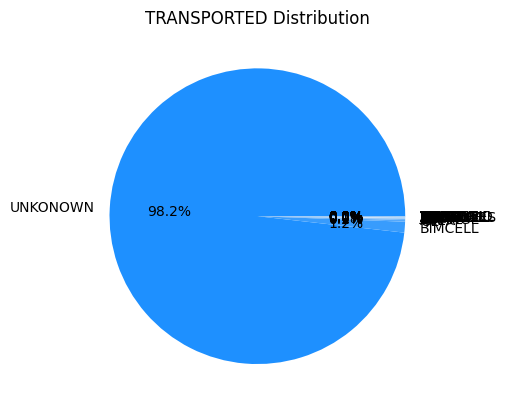

In [49]:
utils.plot_distributions(train_df,'carrier', target_pie=True)

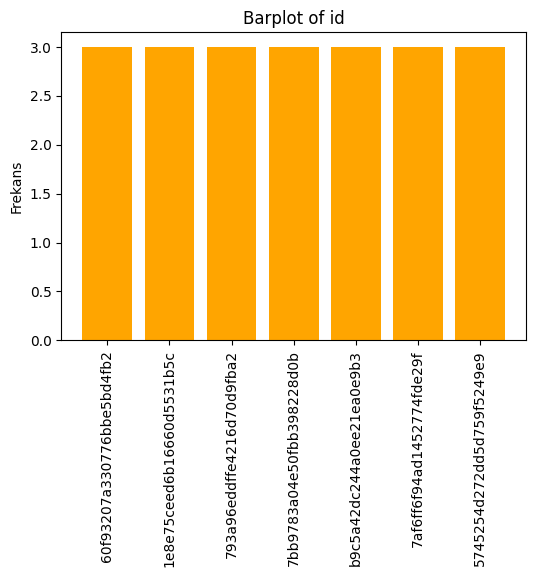

id: 
 id
60f93207a330776bbe5bd4fb2    3
1e8e75ceed6b16660d5531b5c    3
793a96eddffe4216d70d9fba2    3
7bb9783a04e50fbb398228d0b    3
b9c5a42dc244a0ee21ea0e9b3    3
7af6ff6f94ad1452774fde29f    3
5745254d272dd5d759f5249e9    3
Name: count, dtype: int64


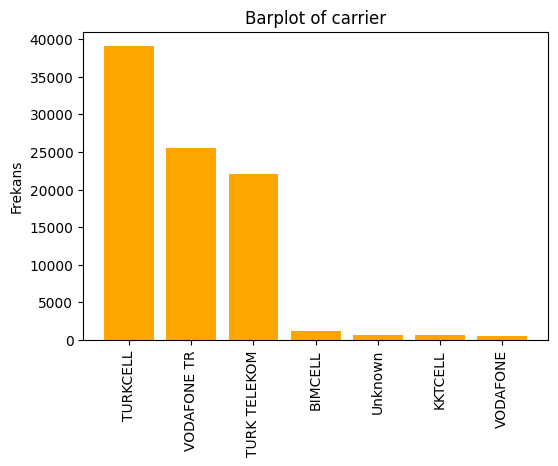

carrier: 
 carrier
TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
BIMCELL          1108
Unknown           684
KKTCELL           659
VODAFONE          560
Name: count, dtype: int64


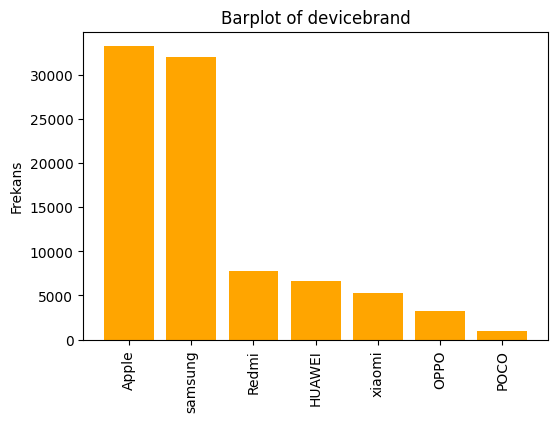

devicebrand: 
 devicebrand
Apple      33238
samsung    31971
Redmi       7709
HUAWEI      6595
xiaomi      5300
OPPO        3247
POCO         989
Name: count, dtype: int64


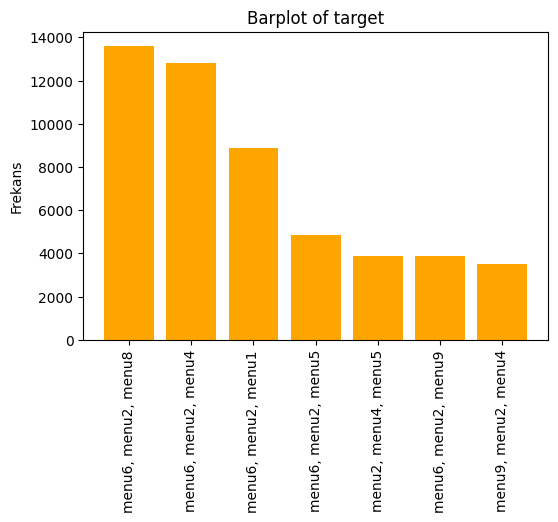

target: 
 target
menu6, menu2, menu8    13583
menu6, menu2, menu4    12827
menu6, menu2, menu1     8891
menu6, menu2, menu5     4861
menu2, menu4, menu5     3861
menu6, menu2, menu9     3860
menu9, menu2, menu4     3525
Name: count, dtype: int64


In [22]:
def plotBar(degisken,n = 7):
    """
        Girdi: Değişken/sütun ismi
               n = en önemli 10 eşsiz değer
        Çıktı: Bar grafiği
    """
    veri_ = train_df[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure(figsize=(6,4))
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=90)
    plt.ylabel("Frekans")
    plt.title("Barplot of {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))
for i in train_df.select_dtypes(include='object'):
    plotBar(i)

In [ ]:
train_df = do_Target_spareted(train_df)
lb = LabelBinarizer()

transformed_data_first = lb.fit_transform(train_df["first_menu"])
transformed_data_second = lb.fit_transform(train_df["second_menu"])
transformed_data_third = lb.fit_transform(train_df["third_menu"])
transformed_data_second = [np.insert(row, 4, 0) for row in transformed_data_second]
transformed_data_third = [np.insert(row, 2, 0) for row in transformed_data_third]

transformed_data_list = [row.tolist() for row in transformed_data_first]

# Listeyi Pandas Serisi'ne dönüştürme
transformed_data_series = pd.Series(transformed_data_list)


transformed_data_list_second = [row.tolist() for row in transformed_data_second]

# Listeyi Pandas Serisi'ne dönüştürme
transformed_data_series_second = pd.Series(transformed_data_list_second)


transformed_data_list_third = [row.tolist() for row in transformed_data_third]

# Listeyi Pandas Serisi'ne dönüştürme
transformed_data_series_third = pd.Series(transformed_data_list_third)

train_df["first_menu"] = transformed_data_series
train_df["second_menu"] = transformed_data_series_second
train_df["third_menu"] = transformed_data_series_third

train_df['target'] = train_df.apply(lambda row: [1 if any(x) else 0 for x in zip(*row[['first_menu', 'second_menu', 'third_menu']])], axis=1)

train_df.drop(["first_menu","second_menu","third_menu"], inplace=True, axis=1)